In [1]:
import Plots, LinearAlgebra, CSV, DataFrames

# A "Plots" egy kitünő vizualizációs eszköz, nagyon sok opcióval.
# Tulajdonsága, hogy sok BACKEND-je van a vizualizációk megjelenítésére.
# (backend - egy-egy konkrét interfészt használó fgv.csomag)
# Példák:
# - plotly() - egy javascript-es interaktív megjelenítő,
#   mely kis adathalmazok esetén javallott.
# - gr()     - egy performens R-alapú rendszer;
#   ez a "beckend" nyomdaminőségű pdf-eket generál.
#
# a !__ GR __! javasolt nagy adathalmazok esetén.

Plots.gr()
# Plots.plotly()

Plots.GRBackend()

In [2]:
# a CSV file-ok beolvasása is kitünő a julia-ban

train_data = CSV.read("hw_data.csv",
    DataFrames.DataFrame, header = false
)

x_height = train_data[:,1]
y_weight = train_data[:,2]
;

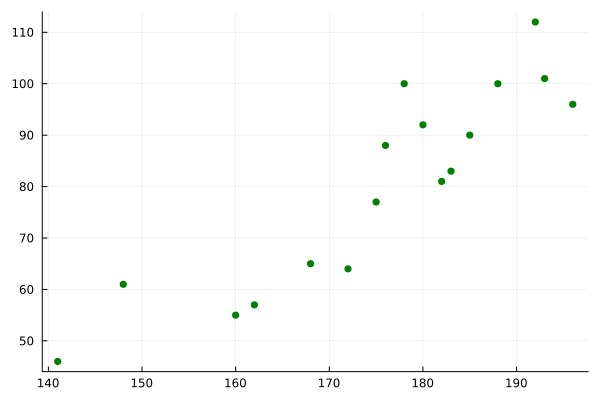

In [3]:
p =Plots.scatter(x_height,y_weight,
    size=[600,400],
    markersize=4, legend=false,
    markercolor=:green, mscolor=:green
)

A 19 tanulási adat.


## A regressziós feladat

$$
f_{w}\left(h\right) = \theta_0 + \theta_1 h
$$

ahol a modell paraméterei a $\theta = [\theta_0, \theta_1]$; a $\theta_0$ angol neve _intercept_, a $\theta_1$ angol neve _slope_.

A hibafüggvény legyen a _négyzetes hiba_.


In [4]:
# a négyzetes hiba definiálása:
sq_err(y,feat_x,f,theta) = sum( (y .- f(feat_x,theta)).^2 )

# a közelítő függvény legyen a _lineáris_ regresszió
f_lin(feat,theta) = feat * theta

# a feature-eket generáló függvény
lin_feat(x) = vcat(map(x) do x
        [1 x]
    end...)

theta = [0; 0]

sq_err(y_weight, lin_feat(x_height), f_lin, theta)

116080

In [5]:
Plots.plotly()

┌ Warning: `PlotlyKaleido` 2.2.4 is not compatible with this version of `Plots`. The declared compatibility is 1.
└ @ Plots ~/.julia/packages/Plots/HyyIK/src/backends.jl:55


Plots.PlotlyBackend()

In [6]:
# paraméterek
theta_1 = range(-320,50, length=100)
theta_2 = range(0, 2, length= 100)

up_lim = 4_000
s_err = [ 
    min(up_lim,sq_err(y_weight, lin_feat(x_height), f_lin, [t1,t2]))
    for t2 in theta_2, t1 in theta_1
]

p = Plots.surface(theta_1,theta_2,s_err,colorbar=false,zlim = [500,up_lim],
    title="Négyzetes hiba"
)

#minimum(s_err)

In [7]:
Plots.contour(theta_1,theta_2, s_err,colorbar=false)

## Feladat:


- (2p) ábrázoljátok a parabolát úgy, hogy látszodjon a hibafüggvény _MINIMUMA_, melyet az ML módszerrel kapunk meg (változtassátok meg a vizualizálási intervallumokat);

- (3p) ábrázoljátok az $L_1$ _abszolút hibát_, azaz a hibafüggvény legyen 
   $$ err(y,f(x)) = abs(y-f(x))$$
   Keressétek meg - kísérletezéssel - az optimumot;
   
- (1p) állapítsuk meg a két típusú optimum közötti távolságot.


Adjunk hozza a tanuló halmazhoz a (198, 21) és a (208,24) értékeket (melyek esetében a súlyokból véletlenül kimaradt egy egyes).


Az új adathalmazra:

- (2p) ábrázoljuk a négyzetes hibát és találjuk meg az optimumot;

- (4p) a $21$ pontból mintavételezzünk véletlenszerűen $11$-et és minden mintavételezett adathalmazra határozzuk meg a négyzetes hiba szerinti optimumot.<br/>
  A mintavételezést $100$-szor ismételve, ábrázoljuk a optimumokat egy __scatter plot__-tal.

- (3p) Értelmezzük az eredményt!


In [8]:
# paraméterek
theta_1 = range(-320,50, length=100)
theta_2 = range(0, 2, length= 100)

up_lim = 4_000
s_err = [ 
    min(up_lim,sq_err(y_weight, lin_feat(x_height), f_lin, [t1,t2]))
    for t2 in theta_2, t1 in theta_1
]

p = Plots.surface(theta_1,theta_2,s_err,colorbar=false,zlim = [500,up_lim],
    title="Négyzetes hiba"
)

In [9]:
abs_err(y,feat_x,f,theta) = sum( abs.(y .- f(feat_x,theta)) )

abs_err (generic function with 1 method)

In [10]:
# paraméterek
theta_1 = range(-500,500, length=100)
theta_2 = range(-1, 3, length= 100)

up_lim = 4_000
s_err = [ 
    min(up_lim,abs_err(y_weight, lin_feat(x_height), f_lin, [t1,t2]))
    for t2 in theta_2, t1 in theta_1
]

p = Plots.surface(theta_1,theta_2,s_err,colorbar=false,zlim = [100,up_lim],
    title="Abszolut hiba"
)

#minimum(s_err)

In [70]:
append!(x_height, [198, 208])
append!(y_weight, [21, 24])

19-element Vector{Int64}:
  61
  65
  55
  57
 100
 101
  46
  90
 112
  88
  83
  64
 100
  92
  81
  77
  96
  21
  24

In [11]:
# paraméterek
theta_1 = range(-15000,15000, length=100)
theta_2 = range(-5000, 5000, length= 100)

up_lim = 1_000_000_000
s_err = [ 
    min(up_lim,sq_err(y_weight, lin_feat(x_height), f_lin, [t1,t2]))
    for t2 in theta_2, t1 in theta_1
]

p = Plots.surface(theta_1,theta_2,s_err,colorbar=false,zlim = [500,up_lim],
    title="Négyzetes hiba"
)



In [12]:
minimum(s_err)


9.588138973574124e6

In [13]:
# selecting random points and finding the opitmums

In [14]:
using Random

In [15]:
function select_random_points(array, num_points)
    num_elements = length(array)
    
    random_indices = randperm(num_elements)[1:num_points]
    
    random_points = array[random_indices]
    
    return random_points
end

select_random_points (generic function with 1 method)

In [16]:
function find_index_of_elem(array, elem)
    
    for i in 1:length(array)
        if array[i] == elem
            return i
        end
    end
            
    return 0
end
        

find_index_of_elem (generic function with 1 method)

In [17]:
opts = []

opts_x = []
opts_y = []



for i in 1:100
    r_x = select_random_points(x_height, 11)
    r_y = select_random_points(y_weight, 11)
    
    # paraméterek
    theta_1 = range(-15000,15000, length=100)
    theta_2 = range(-5000, 5000, length= 100)

    up_lim = 1_000_000_000
    s_err = [ 
        min(up_lim,sq_err(y_weight, lin_feat(x_height), f_lin, [t1,t2]))
        for t2 in theta_2, t1 in theta_1
    ]
    
    mini = minimum(s_err)
    
    index = find_index_of_elem(s_err, mini)

    push!(opts, mini)
    
    push!(opts_x, x_height[index])
    push!(opts_y, y_weight[index])
    
end
    

    
p =Plots.scatter([1:100],opts,
    size=[600,400],
    markersize=4, legend=false,
    markercolor=:yellow, mscolor=:purple
)

LoadError: BoundsError: attempt to access 17-element Vector{Int64} at index [2151]